## import librarirs

In [46]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,classification_report
import pickle
from sklearn.model_selection import GridSearchCV

## import data and take look 

In [47]:
df=pd.read_csv("loan_prediction.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'loan_prediction.csv'

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.describe(include="object")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [ ]:
object_cols=df.select_dtypes(include="object")
object_cols=object_cols.drop(columns="Loan_ID")

### distribution of data for categorical data  

C:\Users\Nour Shosharah\AppData\Local\Temp\ipykernel_17600\1820920260.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap =cm.get_cmap("Pastel1",len(labels))


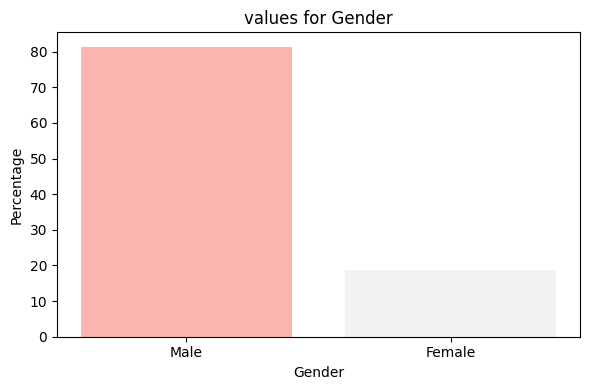

C:\Users\Nour Shosharah\AppData\Local\Temp\ipykernel_17600\1820920260.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap =cm.get_cmap("Pastel1",len(labels))


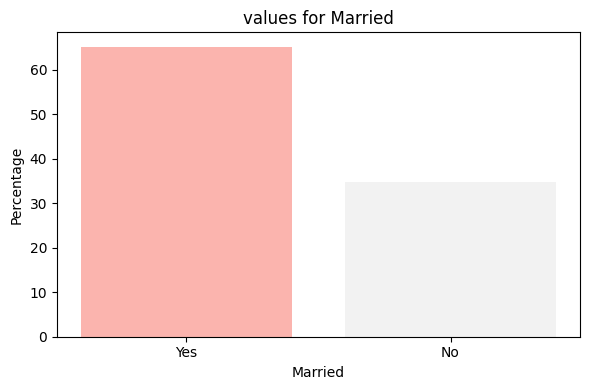

C:\Users\Nour Shosharah\AppData\Local\Temp\ipykernel_17600\1820920260.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap =cm.get_cmap("Pastel1",len(labels))


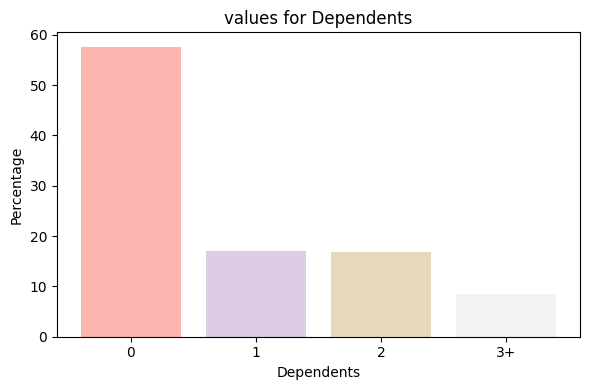

C:\Users\Nour Shosharah\AppData\Local\Temp\ipykernel_17600\1820920260.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap =cm.get_cmap("Pastel1",len(labels))


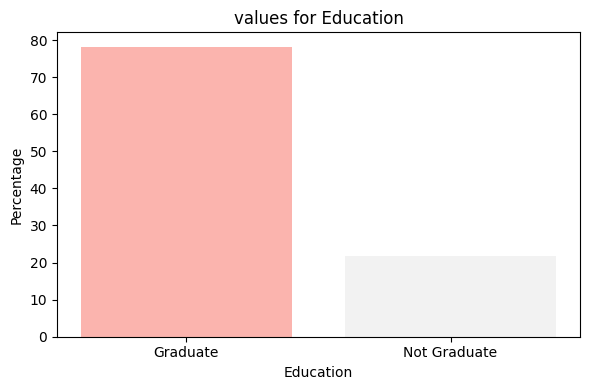

C:\Users\Nour Shosharah\AppData\Local\Temp\ipykernel_17600\1820920260.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap =cm.get_cmap("Pastel1",len(labels))


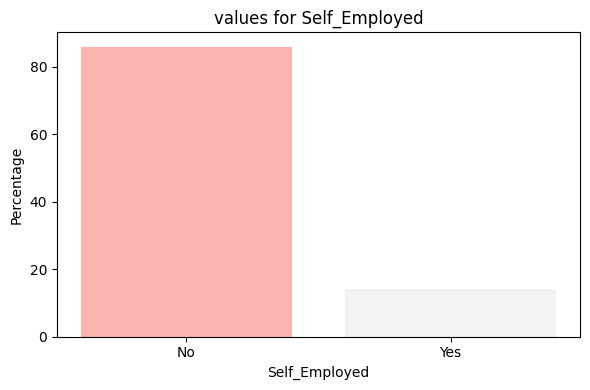

C:\Users\Nour Shosharah\AppData\Local\Temp\ipykernel_17600\1820920260.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap =cm.get_cmap("Pastel1",len(labels))


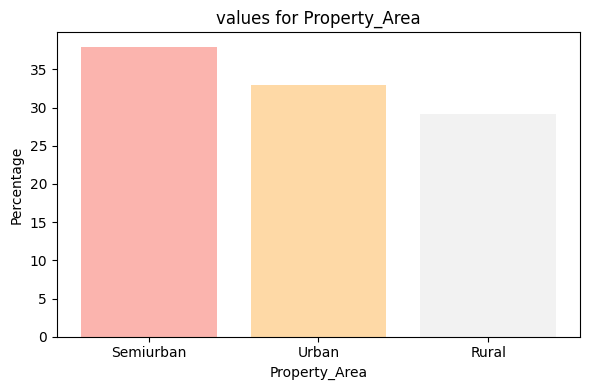

C:\Users\Nour Shosharah\AppData\Local\Temp\ipykernel_17600\1820920260.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap =cm.get_cmap("Pastel1",len(labels))


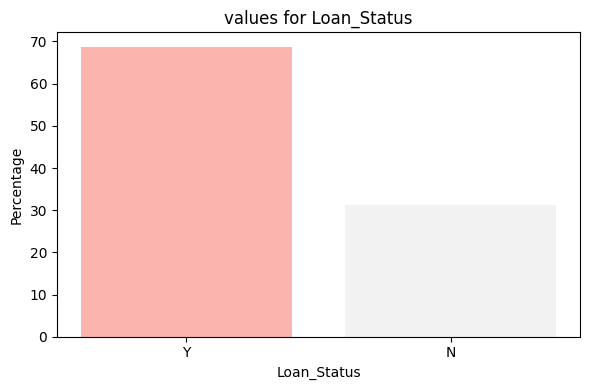

In [ ]:
for col in object_cols.columns:
    value_Counts=object_cols[col].value_counts(normalize=True)*100
    labels=value_Counts.index
    values=value_Counts.values
    cmap =cm.get_cmap("Pastel1",len(labels))
    colors=[cmap(i) for i in range(len(labels))]


    plt.figure(figsize=(6,4))
    plt.bar(labels,values, color=colors)
    plt.title(f'values for {col}')
    plt.ylabel('Percentage')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


   


### check null values , where and count  

In [ ]:
df.isnull().sum()/df.shape[0]

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### imputing nall values in categorical columns

In [ ]:
for col in ['Gender','Married','Dependents', 'Self_Employed']:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()/df.shape[0]

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### distribution of data for numrical  data  

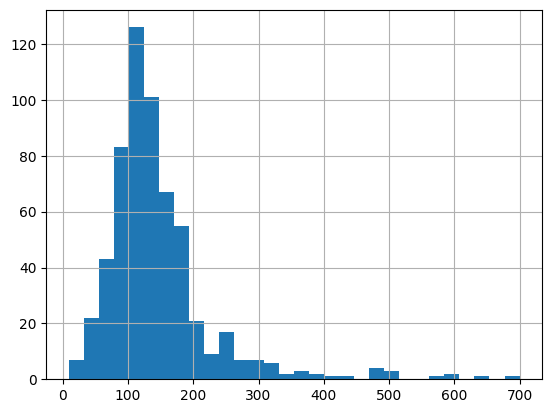

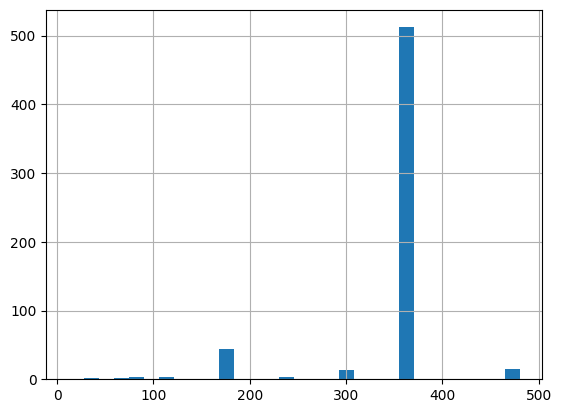

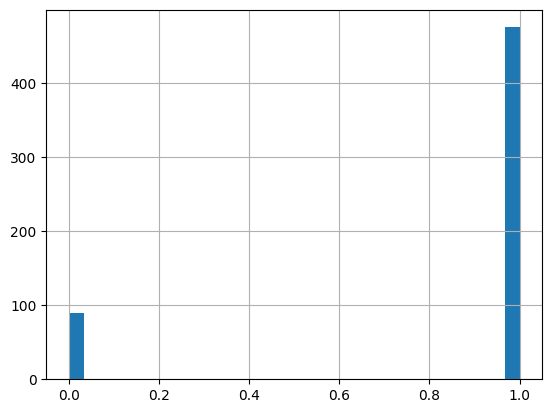

In [ ]:
for col in ['LoanAmount','Loan_Amount_Term','Credit_History']:
    df[col].hist(bins=30)
    plt.show()

### imputing nall values in numrical  columns

In [ ]:
df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()/df.shape[0]

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df['Credit_History']=df['Credit_History'].astype("object")

In [ ]:
numerical_featuers=df.select_dtypes(exclude=object)
numerical_featuers

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,128.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
...,...,...,...,...
609,2900,0.0,71.0,360.0
610,4106,0.0,40.0,180.0
611,8072,240.0,253.0,360.0
612,7583,0.0,187.0,360.0


ApplicantIncome


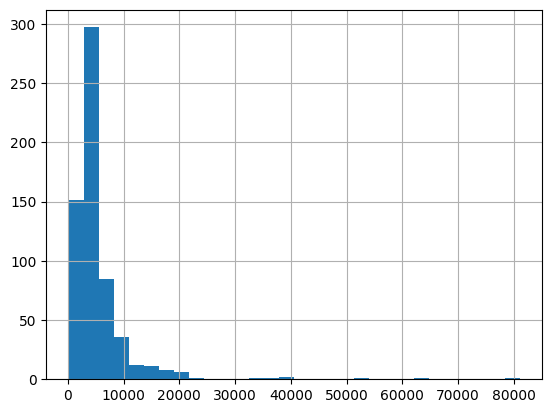

CoapplicantIncome


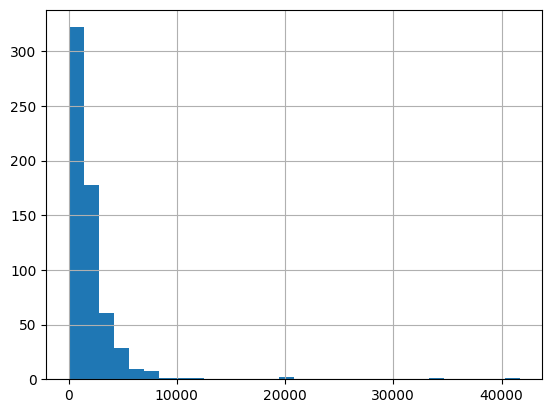

LoanAmount


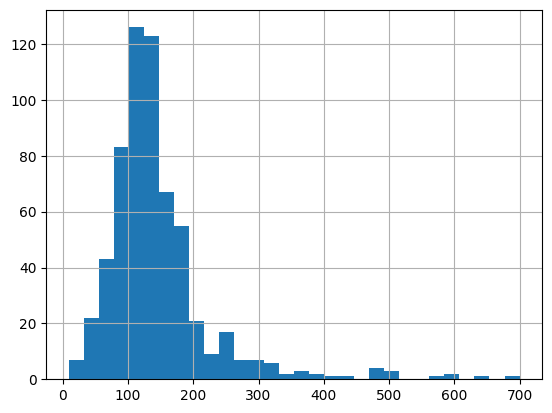

Loan_Amount_Term


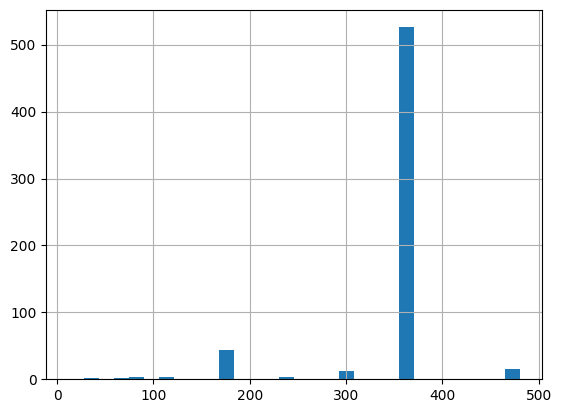

In [ ]:
for col in numerical_featuers:
    df[col].hist(bins=30)
    print(col)
    plt.show()

In [ ]:
df["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

### handling skweness in columns 

In [ ]:
for col in numerical_featuers:
    print(col)
    dfzeros=df[df[col]==0]
    print(dfzeros.shape[0])

ApplicantIncome
0
CoapplicantIncome
273
LoanAmount
0
Loan_Amount_Term
0


In [ ]:
df["ApplicantIncome_log"]=np.log(df["ApplicantIncome"])
df["LoanAmount_log"]=np.log(df["LoanAmount"])
df["CoapplicantIncome_log"]=np.log1p(df["CoapplicantIncome"])

### handling outliers using boxplot

ApplicantIncome_log


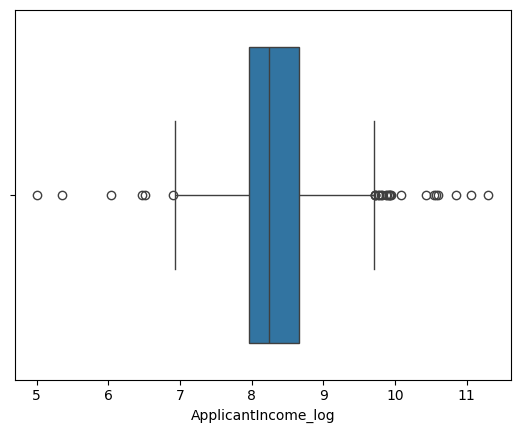

LoanAmount_log


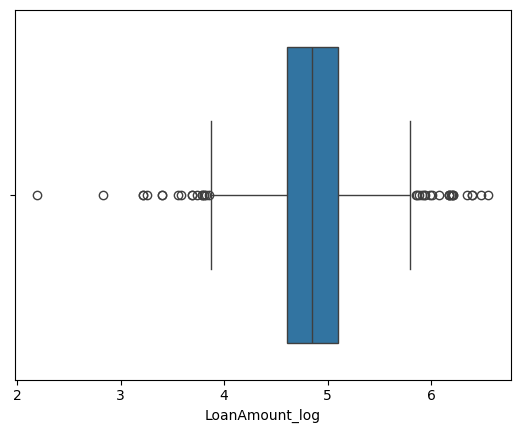

CoapplicantIncome_log


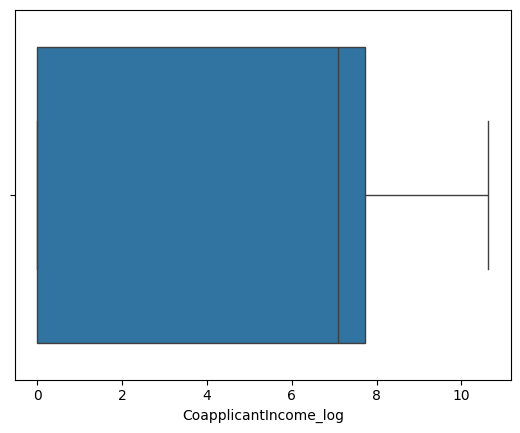

In [ ]:
for col in df[["ApplicantIncome_log","LoanAmount_log","CoapplicantIncome_log"]]:
    print(col)
    sns.boxplot(x=df[col])
    plt.show()

In [ ]:
for col in df[["ApplicantIncome_log","LoanAmount_log","CoapplicantIncome_log"]]:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_whisper =Q1-1.5 * IQR
    print(f"lower_whisper in {col} is {lower_whisper}")
    upper_whisper =Q3+1.5 *IQR
    print(f"upper_whisper in {col} is {upper_whisper}")
    df[col+"_updated"]=np.where (df[col]< lower_whisper, lower_whisper,np.where(df[col]>upper_whisper, upper_whisper, df[col]))

lower_whisper in ApplicantIncome_log is 6.914567376450192
upper_whisper in ApplicantIncome_log is 9.714858994637867
lower_whisper in LoanAmount_log is 3.8625058531812333
upper_whisper in LoanAmount_log is 5.849577627901635
lower_whisper in CoapplicantIncome_log is -11.609845226339234
upper_whisper in CoapplicantIncome_log is 19.349742043898722


In [55]:
caps = {
    "ApplicantIncome_log": (6.914567376450192, 9.714858994637867),
    "LoanAmount_log": (3.8625058531812333, 5.849577627901635),
    "CoapplicantIncome_log": (-11.609845226339234, 19.349742043898722)
}

### Encoding categorical data 

In [ ]:
df_encoded=pd.get_dummies(df, columns=object_cols.columns)

### Featuers Enginerring 

In [ ]:
df_encoded["Total_income"]=df_encoded["ApplicantIncome_log_updated"]+df_encoded["CoapplicantIncome_log_updated"]

In [ ]:
df_encoded["month_payment"]=df_encoded["LoanAmount_log_updated"]/df_encoded["Loan_Amount_Term"]

In [ ]:
df_encoded["Loan_Status_Y"].value_counts(normalize=True)

Loan_Status_Y
True     0.687296
False    0.312704
Name: proportion, dtype: float64

In [ ]:
df_encoded

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_log,LoanAmount_log,CoapplicantIncome_log,ApplicantIncome_log_updated,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,Total_income,month_payment
0,LP001002,5849,0.0,128.0,360.0,1.0,8.674026,4.852030,0.000000,8.674026,...,False,True,False,False,False,True,False,True,8.674026,0.013478
1,LP001003,4583,1508.0,128.0,360.0,1.0,8.430109,4.852030,7.319202,8.430109,...,False,True,False,True,False,False,True,False,15.749312,0.013478
2,LP001005,3000,0.0,66.0,360.0,1.0,8.006368,4.189655,0.000000,8.006368,...,False,False,True,False,False,True,False,True,8.006368,0.011638
3,LP001006,2583,2358.0,120.0,360.0,1.0,7.856707,4.787492,7.765993,7.856707,...,True,True,False,False,False,True,False,True,15.622700,0.013299
4,LP001008,6000,0.0,141.0,360.0,1.0,8.699515,4.948760,0.000000,8.699515,...,False,True,False,False,False,True,False,True,8.699515,0.013747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.0,360.0,1.0,7.972466,4.262680,0.000000,7.972466,...,False,True,False,True,False,False,False,True,7.972466,0.011841
610,LP002979,4106,0.0,40.0,180.0,1.0,8.320205,3.688879,0.000000,8.320205,...,False,True,False,True,False,False,False,True,8.320205,0.021458
611,LP002983,8072,240.0,253.0,360.0,1.0,8.996157,5.533389,5.484797,8.996157,...,False,True,False,False,False,True,False,True,14.480953,0.015371
612,LP002984,7583,0.0,187.0,360.0,1.0,8.933664,5.231109,0.000000,8.933664,...,False,True,False,False,False,True,False,True,8.933664,0.014531


### split to featuers and target column 

In [ ]:
featuers=[ 'Credit_History', 'Gender_Male',
       'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_income', 'month_payment']

target=df_encoded.Loan_Status_Y
X=df_encoded[featuers]
y=target

### preparing data for model

In [ ]:
X.columns

Index(['Credit_History', 'Gender_Male', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_income', 'month_payment'],
      dtype='object')

### select featuers depending on correlation matrix

In [ ]:
corrlation_mat=X.copy()
corrlation_mat["Laoan_status"]=y
corrlation_mat.corr()["Laoan_status"]

Credit_History             0.540556
Gender_Male                0.017987
Married_Yes                0.091478
Dependents_1              -0.038740
Dependents_2               0.062384
Dependents_3+             -0.026123
Education_Not Graduate    -0.085884
Self_Employed_Yes         -0.003700
Property_Area_Semiurban    0.136540
Property_Area_Urban       -0.043621
Total_income               0.064448
month_payment              0.002122
Laoan_status               1.000000
Name: Laoan_status, dtype: float64

<Axes: >

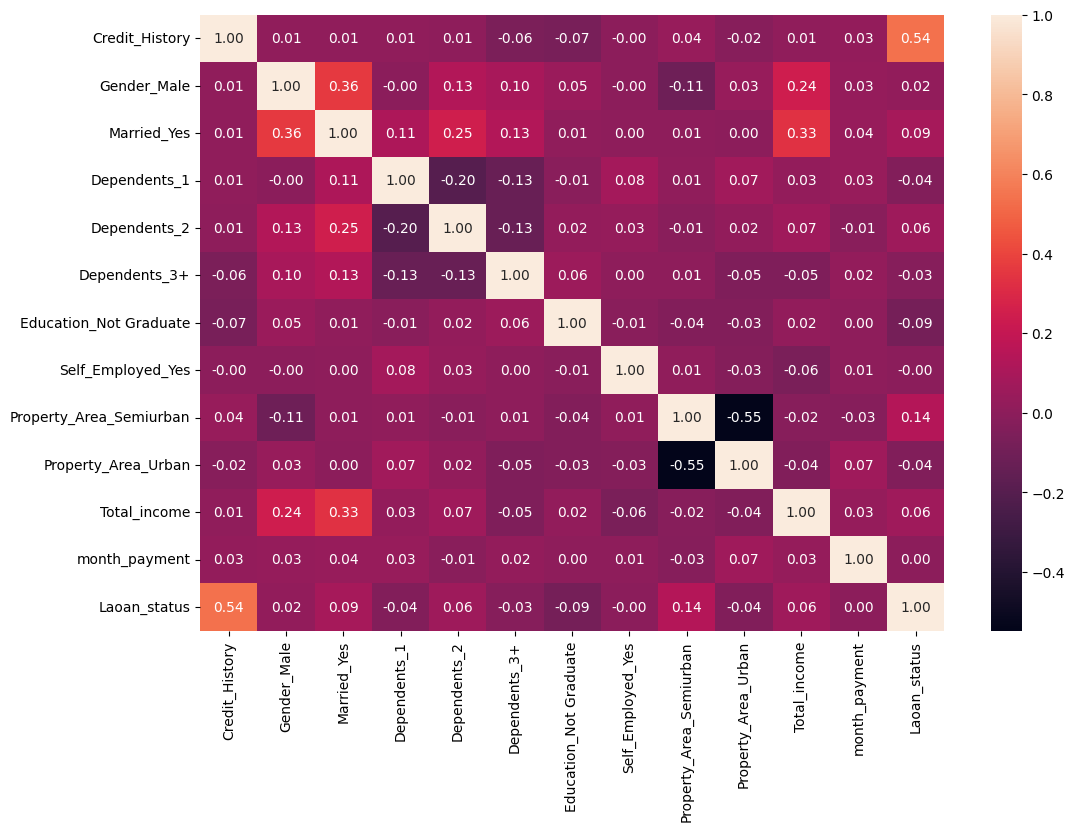

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corrlation_mat.corr(),annot=True,fmt=".2f")

In [ ]:
X_train , X_test , y_train , y_test=train_test_split(X, y ,test_size=0.2, stratify=y, random_state=42)

In [ ]:
models={"LogisticRegression": LogisticRegression(max_iter=1000, solver='liblinear'),
        "DecisionTree":DecisionTreeClassifier(max_depth=4, random_state=42),

}

In [ ]:
for name, model in models.items():
    print(name)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy_=accuracy_score(y_test, y_pred)
    print(accuracy_)
    print("classification report")
    print(classification_report(y_test,y_pred))
    file_name=f"{name}_mode.pkl"
    with open(file_name,'wb') as f:
        pickle.dump(model,f)
    print("ended")



LogisticRegression
0.8536585365853658
classification report
              precision    recall  f1-score   support

       False       0.95      0.55      0.70        38
        True       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123

ended
DecisionTree
0.8536585365853658
classification report
              precision    recall  f1-score   support

       False       0.92      0.58      0.71        38
        True       0.84      0.98      0.90        85

    accuracy                           0.85       123
   macro avg       0.88      0.78      0.81       123
weighted avg       0.86      0.85      0.84       123

ended


### Enhansing model 

#### with parameter "balanced"

In [ ]:
ds_model=DecisionTreeClassifier(max_depth=4, random_state=42,class_weight='balanced')
ds_model.fit(X_train,y_train)
y_pred=ds_model.predict(X_test)
accuracy_=accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))
print("**")

              precision    recall  f1-score   support

       False       0.71      0.63      0.67        38
        True       0.84      0.88      0.86        85

    accuracy                           0.80       123
   macro avg       0.77      0.76      0.76       123
weighted avg       0.80      0.80      0.80       123

**


#### with SMOTE technique

In [ ]:
smote=SMOTE(random_state=42)
X_train_resample, y_train_resample=smote.fit_resample(X_train,y_train)
ds_model_with_smote=DecisionTreeClassifier(max_depth=4, random_state=42,class_weight='balanced')
ds_model_with_smote.fit(X_train_resample,y_train_resample)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=42)

In [ ]:
y_train_resample.value_counts()

Loan_Status_Y
True     337
False    337
Name: count, dtype: int64

In [ ]:
y_pred=ds_model_with_smote.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.56      0.66      0.60        38
        True       0.83      0.76      0.80        85

    accuracy                           0.73       123
   macro avg       0.69      0.71      0.70       123
weighted avg       0.75      0.73      0.74       123



#### using grid search

In [48]:
dt_params_grid= {
    'max_depth':[None,4,6,8,10] ,
    'min_samples_split':[2,5,10],
    'class_weight':[None, 'balanced']
}

In [49]:
dt=DecisionTreeClassifier(random_state=42)
dt_grid=GridSearchCV(dt, dt_params_grid,cv=5, scoring='accuracy',n_jobs=1)
dt_grid.fit(X_train_resample,y_train_resample)
dt_grid.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_split=5, random_state=42)

In [50]:
dt_grid.best_params_

{'class_weight': None, 'max_depth': 6, 'min_samples_split': 5}

In [51]:
dt_grid.best_score_

0.7448866777224986

In [52]:
y_pred=dt_grid.best_estimator_.predict(X_test)

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.59      0.68      0.63        38
        True       0.85      0.79      0.82        85

    accuracy                           0.76       123
   macro avg       0.72      0.74      0.73       123
weighted avg       0.77      0.76      0.76       123



### Predictions

In [54]:
data_for_tested={
  "Loan_ID": "LN123",
  "Gender": "Male",
  "Married": "Yes",
  "Dependents": "0",
  "Education": "Graduate",
  "Self_Employed": "No",
  "ApplicantIncome": 58000,
  "CoapplicantIncome": 0.0,
  "LoanAmount": 150.0,
  "Loan_Amount_Term": 360.0,
  "Credit_History": 1.0,
  "Property_Area": "Urban",
  "Loan_Status": "Y"
}
df_test=pd.DataFrame([data_for_tested])
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LN123,Male,Yes,0,Graduate,No,58000,0.0,150.0,360.0,1.0,Urban,Y


In [56]:
def preprocess_cols(df,featuers,caps):
    df=df.copy()
    object_cols=df.select_dtypes(include="object").columns.tolist()
    object_cols.remove("Loan_ID")
    object_cols.remove("Loan_Status")

    df["ApplicantIncome_log"]=np.log(df["ApplicantIncome"])
    df["LoanAmount_log"]=np.log(df["LoanAmount"])
    df["CoapplicantIncome_log"]=np.log1p(df["CoapplicantIncome"])
    for col in df[["ApplicantIncome_log","LoanAmount_log","CoapplicantIncome_log"]]:
        if caps is not None:
            lower, upper =caps[col]
        else :
            lower, upper =-np.inf, np.inf
        df[col+"_updated"]=np.where (df[col]< lower, lower,np.where(df[col]>upper, upper, df[col]))
    df_final=pd.get_dummies(df, columns=object_cols)
    print(df_final.columns)
    df_final["Total_income"]=df_final["ApplicantIncome_log_updated"]+df_final["CoapplicantIncome_log_updated"]
    df_final["month_payment"]=df_final["LoanAmount_log_updated"]/df_final["Loan_Amount_Term"]
    df_final = df_final.reindex(columns=featuers, fill_value=False)

    return df_final 

In [57]:
features = [
    'Credit_History',
    'Gender_Male',
    'Married_Yes',
    'Dependents_1',
    'Dependents_2',
    'Dependents_3+',
    'Education_Not Graduate',
    'Self_Employed_Yes',
    'Property_Area_Semiurban',
    'Property_Area_Urban',
    'Total_income',
    'month_payment'
]

caps = {
    "ApplicantIncome_log": (6.914567376450192, 9.714858994637867),
    "LoanAmount_log": (3.8625058531812333, 5.849577627901635),
    "CoapplicantIncome_log": (-11.609845226339234, 19.349742043898722)
}

df_test_model=preprocess_cols(df_test,featuers,caps)
ds_model.predict(df_test_model)


Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'ApplicantIncome_log', 'LoanAmount_log', 'CoapplicantIncome_log',
       'ApplicantIncome_log_updated', 'LoanAmount_log_updated',
       'CoapplicantIncome_log_updated', 'Gender_Male', 'Married_Yes',
       'Dependents_0', 'Education_Graduate', 'Self_Employed_No',
       'Property_Area_Urban'],
      dtype='object')


array([ True])

In [60]:
with open ("DecisionTree_mode.pkl", 'rb') as f:
    loaded_model=pickle.load(f)
y_pred_test=loaded_model.predict(df_test_model)
y_pred_test

array([ True])

In [58]:
df_test.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LN123,Male,Yes,0,Graduate,No,58000,0.0,150.0,360.0,1.0,Urban,Y


In [59]:
df_test_model.head(1)

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Total_income,month_payment
0,1.0,True,True,False,False,False,False,False,False,True,9.714859,0.013918
